In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [62]:
readIn = pd.read_csv("training_data.csv")
df = pd.DataFrame(readIn)


In [3]:
readIn = pd.read_csv("data_submission_example.csv")
df_target = pd.DataFrame(readIn)
# df_target.head(20)

# print(df_target.shape)
# print(df_target['BORROWER_ID'].unique)

In [4]:
# print(df.shape)

# index_to_keep = df['BORROWER_ID'].isin(df_target['BORROWER_ID'])

# df = df[index_to_keep]

# print(df.shape)

In [5]:
df.head(10)

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1217.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [6]:
data_count=len(df)

In [7]:
data_count

1602753

In [8]:
coloumns=[
    'CONTRACT_ID',
    'BORROWER_ID',
    'CONTRACT_BANK_ID',
    'CONTRACT_CREDIT_INTERMEDIARY',
    'CONTRACT_CREDIT_LOSS',
    'CONTRACT_CURRENCY',
    'CONTRACT_DATE_OF_LOAN_AGREEMENT',
    'CONTRACT_DEPT_SERVICE_TO_INCOME',
    'CONTRACT_FREQUENCY_TYPE',
    'CONTRACT_INCOME',
    'CONTRACT_INSTALMENT_AMOUNT',
    'CONTRACT_INSTALMENT_AMOUNT_2',
    'CONTRACT_INTEREST_PERIOD',
    'CONTRACT_INTEREST_RATE',
    'CONTRACT_LGD',
    'CONTRACT_LOAN_AMOUNT',
    'CONTRACT_LOAN_CONTRACT_TYPE',
    'CONTRACT_LOAN_TO_VALUE_RATIO',
    'CONTRACT_LOAN_TYPE',
    'CONTRACT_MARKET_VALUE',
    'CONTRACT_MATURITY_DATE',
    'CONTRACT_MORTGAGE_LENDING_VALUE',
    'CONTRACT_MORTGAGE_TYPE',
    'CONTRACT_REFINANCED',
    'CONTRACT_RISK_WEIGHTED_ASSETS',
    'CONTRACT_TYPE_OF_INTEREST_REPAYMENT',
    'BORROWER_BIRTH_YEAR',
    'BORROWER_CITIZENSHIP',
    'BORROWER_COUNTRY',
    'BORROWER_COUNTY',
    'BORROWER_TYPE_OF_CUSTOMER',
    'BORROWER_TYPE_OF_SETTLEMENT',
    'TARGET_EVENT',
    'TARGET_EVENT_DAY'
]

# coloumns=[
#     'CONTRACT_ID',
#     'BORROWER_ID',
#     'CONTRACT_BANK_ID',
#     'CONTRACT_CREDIT_LOSS',
#     'CONTRACT_CURRENCY',
#     'CONTRACT_DATE_OF_LOAN_AGREEMENT',
#     'CONTRACT_FREQUENCY_TYPE',
#     'CONTRACT_LOAN_AMOUNT',
#     'CONTRACT_LOAN_CONTRACT_TYPE',
#     'CONTRACT_LOAN_TYPE',
#     'CONTRACT_MATURITY_DATE',
#     'BORROWER_TYPE_OF_CUSTOMER',
#     'TARGET_EVENT'
# ]

In [9]:
df=df[coloumns]

# Data preparation

## Coloumns

### ISNA

In [10]:
df.isna().sum()

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### CONTRACT_ID

### BORROWER_ID

In [11]:
df['BORROWER_ID'].value_counts()

BORROWER_ID
xNullx      1090
akvNVipI      24
qW3B+pgb      22
95IQewTL      19
JARtY3P1      18
            ... 
LqRn3EsW       1
odaCvCmO       1
seFkKZ2U       1
WJWtceMu       1
Dxng1cGs       1
Name: count, Length: 1149851, dtype: int64

In [12]:
# cols= [
#     'BORROWER_ID',
#     'BORROWER_BIRTH_YEAR',
#     'BORROWER_CITIZENSHIP',
#     'BORROWER_COUNTRY',
#     'BORROWER_COUNTY',
#     'BORROWER_TYPE_OF_CUSTOMER',
# ]

# df_borrower=df[cols]

# print(df_borrower.isna().sum())

In [13]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_BIRTH_YEAR

In [14]:
print(df['BORROWER_BIRTH_YEAR'].min ())
print(df['BORROWER_BIRTH_YEAR'].max())
df['BORROWER_BIRTH_YEAR'] = df.groupby('BORROWER_ID')['BORROWER_BIRTH_YEAR'].transform('max')
df.head(10)

1187.0
1287.0


,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
0,TpK8osXs,d8SqtuEV,1d42bbf5,2.0,0.0,31,2457052,NaN,479a2e13,NaN,...,1.00,NaN,1241.0,98.0,98.0,20.0,A,NaN,-,NaN
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
2,1G10DfKj,gII7nnq4,1d42bbf5,2.0,16350.0,31,2457043,7.05,479a2e13,127305.0,...,74.77,100003.0,1199.0,98.0,98.0,179.0,A,7.0,-,NaN
3,2NLT774,MMkJ8z/e,1d42bbf5,NaN,0.0,31,2457038,NaN,479a2e13,NaN,...,0.99,NaN,1221.0,98.0,98.0,NaN,A,NaN,-,NaN
4,VpylRvay,M417onFP,1d42bbf5,2.0,2395.0,31,2457091,NaN,479a2e13,NaN,...,74.30,100002.0,1260.0,98.0,98.0,178.0,A,1.0,-,NaN
5,5tsDwTjS,u9GRAuen,1d42bbf5,2.0,0.0,31,2457093,NaN,479a2e13,NaN,...,0.98,NaN,1204.0,98.0,98.0,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,1246.0,NaN,NaN,NaN,A,NaN,-,NaN
7,ebtK6u+,L2Nu2zZe,1d42bbf5,2.0,0.0,31,2457046,NaN,479a2e13,NaN,...,1.03,NaN,1255.0,98.0,98.0,4.0,A,NaN,-,NaN
8,ffJh4MY,5A0GWOi2,1d42bbf5,2.0,0.0,31,2457049,NaN,479a2e13,NaN,...,1.04,NaN,1234.0,98.0,98.0,NaN,A,NaN,-,NaN
9,eo09vYuo,lqPGd2+x,1d42bbf5,2.0,0.0,31,2457081,NaN,479a2e13,NaN,...,1.00,0.0,1228.0,98.0,98.0,3.0,A,NaN,-,NaN


In [15]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_CITIZENSHIP

In [16]:
df['BORROWER_CITIZENSHIP'] = df.groupby('BORROWER_ID')['BORROWER_CITIZENSHIP'].transform('max')
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59422
CONTRACT_CREDIT_LOSS                     36154
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201480
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198022
CONTRACT_INSTALMENT_AMOUNT             1314531
CONTRACT_INSTALMENT_AMOUNT_2             42438
CONTRACT_INTEREST_PERIOD                371312
CONTRACT_INTEREST_RATE                   35370
CONTRACT_LGD                             33722
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176530
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074843
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORT

### BORROWER_COUNTRY

In [23]:
df= df[df['BORROWER_COUNTRY']==98.0]

### BORROWER_COUNTY

In [26]:
df['BORROWER_COUNTY']=df['BORROWER_COUNTY'].fillna(-1)

### BORROWER_TYPE_OF_CUSTOMER

### BORROWER_TYPE_OF_SETTLEMENT

In [29]:
df['BORROWER_TYPE_OF_SETTLEMENT']=df['BORROWER_TYPE_OF_SETTLEMENT'].fillna(-1)

### CONTRACT_BANK_ID

CONTRACT_CREDIT_INTERMEDIARY
2.0        1061767
1.0         452608
20001.0      18641
0.0            561
Name: count, dtype: int64

### CONTRACT_CREDIT_INTERMEDIARY

In [35]:
df['CONTRACT_CREDIT_INTERMEDIARY'].value_counts()

CONTRACT_CREDIT_INTERMEDIARY
 2.0        1061767
 1.0         452608
-1.0          25644
 20001.0      18641
 0.0            561
Name: count, dtype: int64

In [34]:
df['CONTRACT_CREDIT_INTERMEDIARY']=df['CONTRACT_CREDIT_INTERMEDIARY'].fillna(-1)

### CONTRACT_CREDIT_LOSS

????? ez full zavaros

<Axes: >

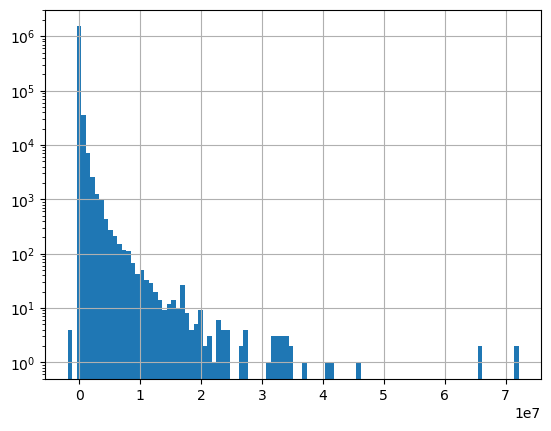

In [63]:
df['CONTRACT_CREDIT_LOSS'].hist(bins=100, log=True)

In [66]:
df['CONTRACT_CREDIT_LOSS'].fillna(0)

(1602674, 34)

In [65]:
df.shape
df = df[~((df['TARGET_EVENT'] == 'K') & (df['CONTRACT_CREDIT_LOSS'] == 0))]

In [68]:
df2=df[df['CONTRACT_CREDIT_LOSS'] == 0]

df2['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    374275
E     14771
Name: count, dtype: int64

In [71]:
df3=df[df['CONTRACT_CREDIT_LOSS'] > df['CONTRACT_CREDIT_LOSS'].max()*0.1]

df3['TARGET_EVENT'].value_counts()

TARGET_EVENT
-    366
E    157
K     66
Name: count, dtype: int64

### CONTRACT_CURRENCY

In [72]:
df=df[df['CONTRACT_CURRENCY']==31]

### CONTRACT_DATE_OF_LOAN_AGREEMENT

### CONTRACT_DEPT_SERVICE_TO_INCOME

In [ ]:
df['CONTRACT_DEPT_SERVICE_TO_INCOME'].value_counts()

### CONTRACT_FREQUENCY_TYPE

In [90]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

CONTRACT_FREQUENCY_TYPE
479a2e13    1477374
2f88e16c      58697
87db11f5      47144
3265c5b7      17384
ad534644       1616
89efd382        337
2aebe4cb         53
bd092d5a          7
Name: count, dtype: int64

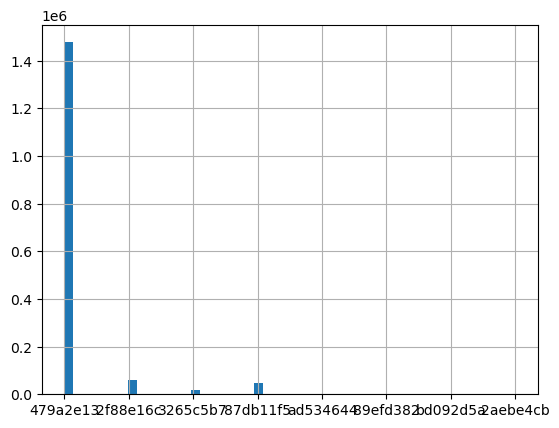

In [74]:
df['CONTRACT_FREQUENCY_TYPE'].hist(bins=50)
plt.show()

### CONTRACT_INCOME

In [ ]:
df['CONTRACT_INCOME'].value_counts()

In [ ]:
df['CONTRACT_INCOME'].hist(bins=50)
plt.show()

In [ ]:
cols=['CONTRACT_DEPT_SERVICE_TO_INCOME','CONTRACT_INCOME', 'CONTRACT_LOAN_AMOUNT' ]

df[cols].head(20)

### CONTRACT_INSTALMENT_AMOUNT and _2

In [79]:
df2 = df[((df['CONTRACT_INSTALMENT_AMOUNT'] >0) & (df['CONTRACT_INSTALMENT_AMOUNT_2'].isna()))]
df2

,CONTRACT_ID,BORROWER_ID,CONTRACT_BANK_ID,CONTRACT_CREDIT_INTERMEDIARY,CONTRACT_CREDIT_LOSS,CONTRACT_CURRENCY,CONTRACT_DATE_OF_LOAN_AGREEMENT,CONTRACT_DEPT_SERVICE_TO_INCOME,CONTRACT_FREQUENCY_TYPE,CONTRACT_INCOME,...,CONTRACT_RISK_WEIGHTED_ASSETS,CONTRACT_TYPE_OF_INTEREST_REPAYMENT,BORROWER_BIRTH_YEAR,BORROWER_CITIZENSHIP,BORROWER_COUNTRY,BORROWER_COUNTY,BORROWER_TYPE_OF_CUSTOMER,BORROWER_TYPE_OF_SETTLEMENT,TARGET_EVENT,TARGET_EVENT_DAY
1,EtIEHrcH,lrdxML0g,1d42bbf5,NaN,0.0,31,2457036,NaN,479a2e13,NaN,...,74.17,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
6,drZAWXaR,XPWFcJZI,1d42bbf5,NaN,0.0,31,2457095,33.94,479a2e13,172647.0,...,1.00,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
13,MVWmtax,zPuIFg21,1d42bbf5,NaN,NaN,31,2457112,NaN,479a2e13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
15,d8KR1-k,G/3PUQP2,1d42bbf5,NaN,NaN,31,2457100,NaN,479a2e13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
38,HyKm+mv1,DN940EUH,1d42bbf5,NaN,NaN,31,2457107,11.65,479a2e13,169430.0,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1602528,S4fPRnb5,DsDySXH3,04f86595,NaN,NaN,31,2457052,NaN,479a2e13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
1602542,9s9hnx+N,PcuwvVuO,3b3b8a5e,NaN,NaN,31,2457239,NaN,479a2e13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,E,2457262.0
1602553,x9bJHj0X,vPskTXgG,04f86595,NaN,NaN,31,2457052,NaN,479a2e13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN
1602658,m0yBW+xn,W9ou2AkK,04f86595,NaN,NaN,31,2457052,NaN,479a2e13,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,A,NaN,-,NaN


In [80]:
df['CONTRACT_INSTALMENT_AMOUNT'] = df['CONTRACT_INSTALMENT_AMOUNT'].fillna(df['CONTRACT_INSTALMENT_AMOUNT_2'])


In [82]:
df = df.drop('CONTRACT_INSTALMENT_AMOUNT_2', axis=1)

In [83]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             59412
CONTRACT_CREDIT_LOSS                     36148
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         201458
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         198002
CONTRACT_INSTALMENT_AMOUNT               26845
CONTRACT_INTEREST_PERIOD                371228
CONTRACT_INTEREST_RATE                   35363
CONTRACT_LGD                             33716
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1176418
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1074749
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE        1064852
CONTRACT_MORT

### CONTRACT_INTEREST_PERIOD

In [87]:
len(df['CONTRACT_INTEREST_PERIOD'].unique())

1039

<Axes: >

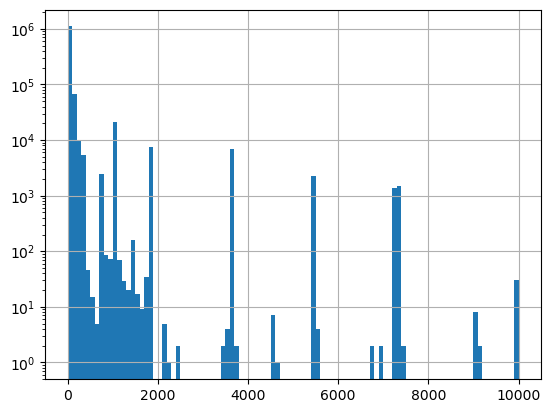

In [91]:
df['CONTRACT_INTEREST_PERIOD'].hist(bins=100, log=True)

In [92]:
df = df.drop('CONTRACT_INTEREST_PERIOD', axis=1)

### CONTRACT_INTEREST_RATE

In [93]:
df['CONTRACT_INTEREST_RATE'].value_counts()

CONTRACT_INTEREST_RATE
0.00     110264
6.13       3223
6.08       3176
6.11       3102
6.10       3088
          ...  
39.32         1
42.01         1
94.86         1
63.31         1
37.97         1
Name: count, Length: 4322, dtype: int64

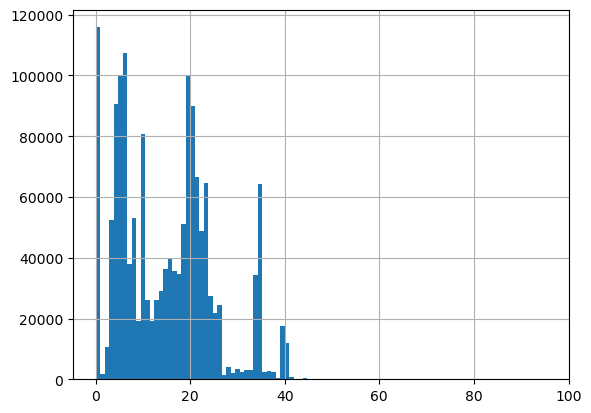

In [94]:
df['CONTRACT_INTEREST_RATE'].hist(bins=100)
plt.show()

### CONTRACT_LGD

<Axes: >

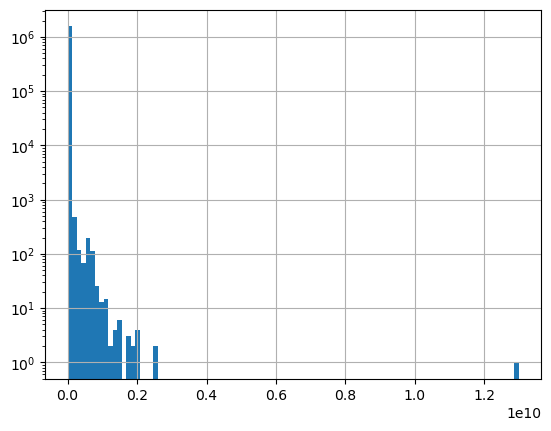

In [97]:
df['CONTRACT_LGD'].hist(bins=100, log=True)

In [100]:
df=df[df['CONTRACT_LGD'].max()*0.5>df['CONTRACT_LGD']]

In [102]:
len(df)

1568874

In [110]:
print(df.isna().sum())

CONTRACT_ID                                  0
BORROWER_ID                                  0
CONTRACT_BANK_ID                             0
CONTRACT_CREDIT_INTERMEDIARY             33763
CONTRACT_CREDIT_LOSS                      2441
CONTRACT_CURRENCY                            0
CONTRACT_DATE_OF_LOAN_AGREEMENT              0
CONTRACT_DEPT_SERVICE_TO_INCOME         169630
CONTRACT_FREQUENCY_TYPE                      0
CONTRACT_INCOME                         166179
CONTRACT_INSTALMENT_AMOUNT                  14
CONTRACT_INTEREST_RATE                    1647
CONTRACT_LGD                                 0
CONTRACT_LOAN_AMOUNT                         0
CONTRACT_LOAN_CONTRACT_TYPE                  0
CONTRACT_LOAN_TO_VALUE_RATIO           1142681
CONTRACT_LOAN_TYPE                           0
CONTRACT_MARKET_VALUE                  1041613
CONTRACT_MATURITY_DATE                       0
CONTRACT_MORTGAGE_LENDING_VALUE        1031767
CONTRACT_MORTGAGE_TYPE                 1031767
CONTRACT_REFI

### CONTRACT_LOAN_AMOUNT

### CONTRACT_LOAN_CONTRACT_TYPE

In [104]:
df['CONTRACT_LOAN_CONTRACT_TYPE'].value_counts()

CONTRACT_LOAN_CONTRACT_TYPE
1     612535
2     371958
12    358714
3      77752
11     55903
9      49248
6      32939
4       9825
Name: count, dtype: int64

### CONTRACT_LOAN_TO_VALUE_RATIO

<Axes: >

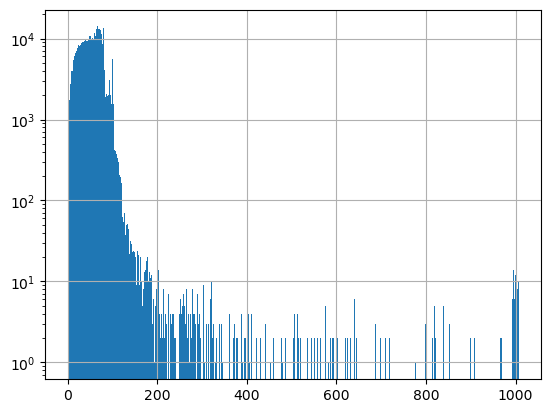

In [118]:
df['CONTRACT_LOAN_TO_VALUE_RATIO'].hist(bins=500, log=True)

In [119]:
df=df[df['CONTRACT_LOAN_TO_VALUE_RATIO'].max()*0.5>df['CONTRACT_LOAN_TO_VALUE_RATIO']]

In [ ]:
len(df)

In [111]:
df['CONTRACT_LOAN_CONTRACT_TYPE'].fillna(0)

0          1
1          2
2          2
3          2
4          1
          ..
1585990    2
1585991    1
1585992    2
1585993    2
1585994    1
Name: CONTRACT_LOAN_CONTRACT_TYPE, Length: 1568874, dtype: int64

### CONTRACT_LOAN_TYPE

In [107]:
df['CONTRACT_LOAN_TYPE'].value_counts()

CONTRACT_LOAN_TYPE
b503a0de    995841
1f951336    157698
d3aaffde     88977
7e2065f4     87026
69f70539     66884
955ae3ef     56611
2f88e16c     42693
cf07c2dd     35934
5a06241e     20926
83910425      6810
694cbaee      3464
0aeb4094      2746
eab72d7a      2300
95c4f8fb       571
f792971b       234
cde77491       103
47693941        53
8fe006f1         3
Name: count, dtype: int64

In [109]:
df3=df[df['CONTRACT_MARKET_VALUE']>0]

df3['CONTRACT_LOAN_TYPE'].value_counts()

CONTRACT_LOAN_TYPE
b503a0de    212376
1f951336    147865
955ae3ef     54178
cf07c2dd     25140
2f88e16c     19028
7e2065f4     15762
d3aaffde     12522
694cbaee      3232
0aeb4094      2733
83910425       765
95c4f8fb       571
5a06241e       276
f792971b       188
eab72d7a       151
cde77491        86
47693941        29
69f70539        21
Name: count, dtype: int64

### CONTRACT_MARKET_VALUE

<Axes: >

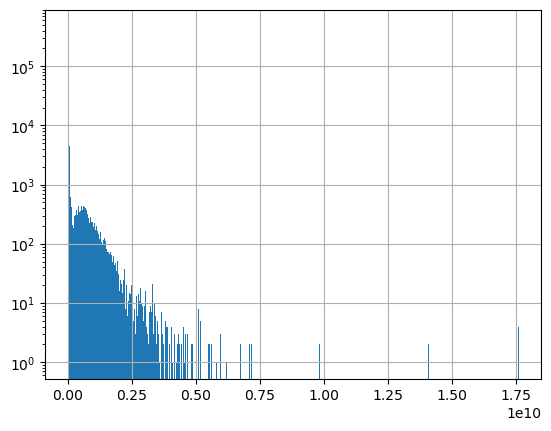

In [115]:
df['CONTRACT_MARKET_VALUE'].hist(bins=500, log=True)

In [116]:
df=df[df['CONTRACT_MARKET_VALUE'].max()*0.5>df['CONTRACT_MARKET_VALUE']]

<Axes: >

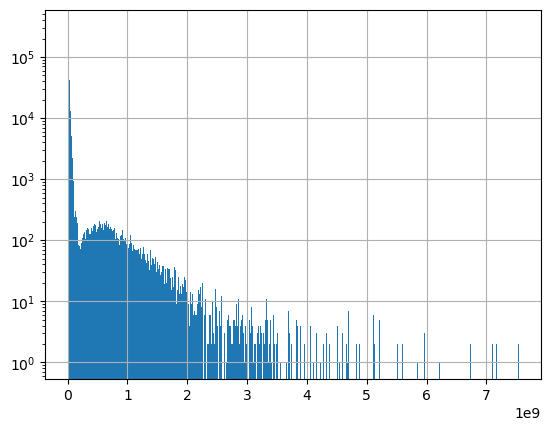

In [117]:
df['CONTRACT_MARKET_VALUE'].hist(bins=500, log=True)

In [ ]:
len(df)

### CONTRACT_MATURITY_DATE

### CONTRACT_MORTGAGE_LENDING_VALUE

<Axes: >

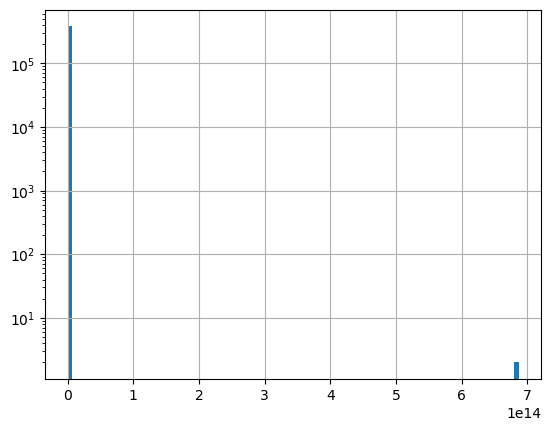

In [122]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].hist(bins=100, log=True)

In [123]:
df=df[df['CONTRACT_MORTGAGE_LENDING_VALUE'].max()*0.5>df['CONTRACT_MORTGAGE_LENDING_VALUE']]

<Axes: >

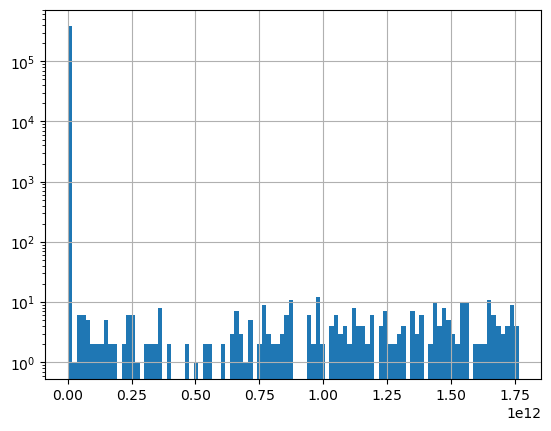

In [124]:
df['CONTRACT_MORTGAGE_LENDING_VALUE'].hist(bins=100, log=True)

In [125]:
len(df)

380484

### CONTRACT_MORTGAGE_TYPE

In [126]:
df['CONTRACT_MORTGAGE_TYPE'].fillna(0)

CONTRACT_MORTGAGE_TYPE
4.0     243172
46.0     84764
45.0     17619
8.0      12836
6.0       9922
5.0       5415
44.0      3982
48.0      2536
47.0       102
41.0        89
42.0        32
1.0          8
13.0         7
Name: count, dtype: int64

### CONTRACT_REFINANCED

In [128]:
df['CONTRACT_REFINANCED'].value_counts()

CONTRACT_REFINANCED
2.0        358749
1.0         21584
10001.0       151
Name: count, dtype: int64

### CONTRACT_RISK_WEIGHTED_ASSETS

<Axes: >

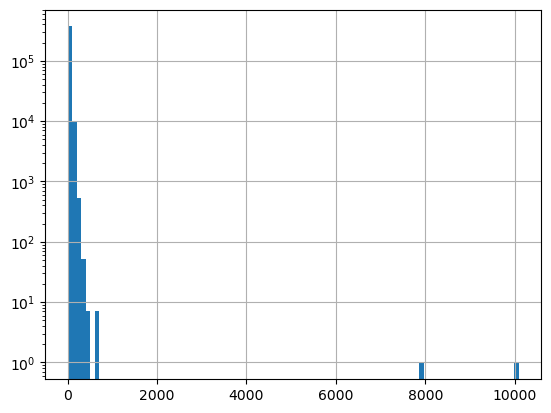

In [130]:
df['CONTRACT_RISK_WEIGHTED_ASSETS'].hist(bins=100, log=True)

In [131]:
df=df[df['CONTRACT_RISK_WEIGHTED_ASSETS'].max()*0.5>df['CONTRACT_RISK_WEIGHTED_ASSETS']]

### CONTRACT_TYPE_OF_INTEREST_REPAYMENT

In [132]:
df['CONTRACT_TYPE_OF_INTEREST_REPAYMENT'].value_counts()

CONTRACT_TYPE_OF_INTEREST_REPAYMENT
100004.0    136075
100003.0    118427
100002.0     81776
110001.0     32950
100001.0      9987
140003.0       583
140001.0       508
140002.0       144
0.0             32
Name: count, dtype: int64

### TARGET_EVENT_DAY

### TARGET_EVENT

### Check ISNA

In [ ]:
df.head(10)

In [ ]:
duplikalt_sorok = df[df.duplicated(subset=['CONTRACT_ID','BORROWER_ID','CONTRACT_BANK_ID'])]

In [ ]:
len(duplikalt_sorok)

In [ ]:
col=['CONTRACT_CREDIT_LOSS', 'TARGET_EVENT']
df2=df[col]
df2.head(100)

First, i should prepare the borrower data, and maybe with that, i could predict certain elements  of the contract data.

In [ ]:
nan_count=  df.isna().sum()

In [ ]:
df['CONTRACT_FREQUENCY_TYPE'].value_counts()

In [ ]:
coloumns = nan_count[nan_count/data_count<=0.5].index
off_coloumns = nan_count[nan_count/data_count>0.5].index

print(len(coloumns))
print(len(off_coloumns))

In [ ]:
df_2=df[coloumns]

In [ ]:
off_coloumns

#### CONTRACT_CREDIT_LOSS

In [ ]:
df['CONTRACT_CREDIT_LOSS'].isna().sum()

In [ ]:
df['CONTRACT_CREDIT_LOSS']=df['CONTRACT_CREDIT_LOSS'].fillna(0)

In [ ]:
df.nunique()

In [ ]:
df=df.drop_duplicates()

print(df.shape)
df.to_csv('df.csv', index=False)